# Tagging

## Part of Speech Tagging POS

In [ ]:
import nltk
sentence = "Artificial intelligence (AI), sometimes called machine intelligence, is intelligence demonstrated by machines, in contrast to the natural intelligence displayed by humans and other animals."
tokens = nltk.word_tokenize(sentence)
tagged_sent = nltk.pos_tag(tokens, tagset='universal')
print(tagged_sent)

[('Artificial', u'ADJ'), ('intelligence', u'NOUN'), ('(', u'.'), ('AI', u'NOUN'), (')', u'.'), (',', u'.'), ('sometimes', u'ADV'), ('called', u'VERB'), ('machine', u'NOUN'), ('intelligence', u'NOUN'), (',', u'.'), ('is', u'VERB'), ('intelligence', u'NOUN'), ('demonstrated', u'VERB'), ('by', u'ADP'), ('machines', u'NOUN'), (',', u'.'), ('in', u'ADP'), ('contrast', u'NOUN'), ('to', u'PRT'), ('the', u'DET'), ('natural', u'ADJ'), ('intelligence', u'NOUN'), ('displayed', u'VERB'), ('by', u'ADP'), ('humans', u'NOUN'), ('and', u'CONJ'), ('other', u'ADJ'), ('animals', u'NOUN'), ('.', u'.')]


In [2]:
from pattern.en import tag
tagged_sent2 = tag(sentence)
print(tagged_sent2)

[(u'Artificial', u'JJ'), (u'intelligence', u'NN'), (u'(', u'('), (u'AI', u'NNP'), (u')', u')'), (u',', u','), (u'sometimes', u'RB'), (u'called', u'VBN'), (u'machine', u'NN'), (u'intelligence', u'NN'), (u',', u','), (u'is', u'VBZ'), (u'intelligence', u'NN'), (u'demonstrated', u'VBN'), (u'by', u'IN'), (u'machines', u'NNS'), (u',', u','), (u'in', u'IN'), (u'contrast', u'NN'), (u'to', u'TO'), (u'the', u'DT'), (u'natural', u'JJ'), (u'intelligence', u'NN'), (u'displayed', u'VBN'), (u'by', u'IN'), (u'humans', u'NNS'), (u'and', u'CC'), (u'other', u'JJ'), (u'animals', u'NNS'), (u'.', u'.')]


## Shallow Parser

In [3]:
from pattern.en import parsetree
tree = parsetree(sentence)
print(tree)

[Sentence('Artificial/JJ/B-NP/O intelligence/NN/I-NP/O (/(/O/O AI/NNP/B-NP/O )/)/O/O ,/,/O/O sometimes/RB/B-VP/O called/VBN/I-VP/O machine/NN/B-NP/O intelligence/NN/I-NP/O ,/,/O/O is/VBZ/B-VP/O intelligence/NN/B-NP/O demonstrated/VBN/B-VP/O by/IN/B-PP/B-PNP machines/NNS/B-NP/I-PNP ,/,/O/O in/IN/B-PP/B-PNP contrast/NN/B-NP/I-PNP to/TO/O/O the/DT/B-NP/O natural/JJ/I-NP/O intelligence/NN/I-NP/O displayed/VBN/B-VP/O by/IN/B-PP/B-PNP humans/NNS/B-NP/I-PNP and/CC/I-NP/I-PNP other/JJ/I-NP/I-PNP animals/NNS/I-NP/I-PNP ././O/O')]


In [4]:
for sentence_tree in tree:
    print sentence_tree.chunks

[Chunk('Artificial intelligence/NP'), Chunk('AI/NP'), Chunk('sometimes called/VP'), Chunk('machine intelligence/NP'), Chunk('is/VP'), Chunk('intelligence/NP'), Chunk('demonstrated/VP'), Chunk('by/PP'), Chunk('machines/NP'), Chunk('in/PP'), Chunk('contrast/NP'), Chunk('the natural intelligence/NP'), Chunk('displayed/VP'), Chunk('by/PP'), Chunk('humans and other animals/NP')]


In [5]:
for sentence_tree in tree:
    for chunk in sentence_tree.chunks:
        print chunk.type, '->', [(word.string, word.type) for word in chunk.words]

NP -> [(u'Artificial', u'JJ'), (u'intelligence', u'NN')]
NP -> [(u'AI', u'NNP')]
VP -> [(u'sometimes', u'RB'), (u'called', u'VBN')]
NP -> [(u'machine', u'NN'), (u'intelligence', u'NN')]
VP -> [(u'is', u'VBZ')]
NP -> [(u'intelligence', u'NN')]
VP -> [(u'demonstrated', u'VBN')]
PP -> [(u'by', u'IN')]
NP -> [(u'machines', u'NNS')]
PP -> [(u'in', u'IN')]
NP -> [(u'contrast', u'NN')]
NP -> [(u'the', u'DT'), (u'natural', u'JJ'), (u'intelligence', u'NN')]
VP -> [(u'displayed', u'VBN')]
PP -> [(u'by', u'IN')]
NP -> [(u'humans', u'NNS'), (u'and', u'CC'), (u'other', u'JJ'), (u'animals', u'NNS')]


In [6]:
from pattern.en import parsetree, Chunk
from nltk.tree import Tree

def create_sentence_tree(sentence, lemmatize=False):
    sentence_tree = parsetree(sentence,
                             relations=True,
                             lemmata=lemmatize)
    return sentence_tree[0]

def get_sentence_tree_constituents(sentence_tree):
    return sentence_tree.constituents()

def process_sentence_tree(sentence_tree):
    
    tree_constituents = get_sentence_tree_constituents(sentence_tree)
    processed_tree = [
                        (item.type,
                         [
                             (w.string, w.type)
                             for w in item.words
                         ]
                        )
                        if type(item) == Chunk
                        else ('-',
                              [
                                   (item.string, item.type)
                              ]
                             )
                             for item in tree_constituents
                    ]
    
    return processed_tree

def print_sentence_tree(sentence_tree):
    

    processed_tree = process_sentence_tree(sentence_tree)
    processed_tree = [
                        Tree( item[0],
                             [
                                 Tree(x[1], [x[0]])
                                 for x in item[1]
                             ]
                            )
                            for item in processed_tree
                     ]

    tree = Tree('S', processed_tree )
    print tree
    
def visualize_sentence_tree(sentence_tree):
    
    processed_tree = process_sentence_tree(sentence_tree)
    processed_tree = [
                        Tree( item[0],
                             [
                                 Tree(x[1], [x[0]])
                                 for x in item[1]
                             ]
                            )
                            for item in processed_tree
                     ]
    tree = Tree('S', processed_tree )
    tree.draw()

In [7]:
t = create_sentence_tree(sentence)
print t

Sentence('Artificial/JJ/B-NP/O/O intelligence/NN/I-NP/O/O (/(/O/O/O AI/NNP/B-NP/O/O )/)/O/O/O ,/,/O/O/O sometimes/RB/B-VP/O/VP-1 called/VBN/I-VP/O/VP-1 machine/NN/B-NP/O/NP-OBJ-1 intelligence/NN/I-NP/O/NP-OBJ-1 ,/,/O/O/O is/VBZ/B-VP/O/VP-2 intelligence/NN/B-NP/O/NP-OBJ-2*NP-SBJ-3 demonstrated/VBN/B-VP/O/VP-3 by/IN/B-PP/B-PNP/O machines/NNS/B-NP/I-PNP/O ,/,/O/O/O in/IN/B-PP/B-PNP/O contrast/NN/B-NP/I-PNP/O to/TO/O/O/O the/DT/B-NP/O/NP-SBJ-4 natural/JJ/I-NP/O/NP-SBJ-4 intelligence/NN/I-NP/O/NP-SBJ-4 displayed/VBN/B-VP/O/VP-4 by/IN/B-PP/B-PNP/O humans/NNS/B-NP/I-PNP/O and/CC/I-NP/I-PNP/O other/JJ/I-NP/I-PNP/O animals/NNS/I-NP/I-PNP/O ././O/O/O')


In [8]:
pt = process_sentence_tree(t)
pt

[(u'NP', [(u'Artificial', u'JJ'), (u'intelligence', u'NN')]),
 ('-', [(u'(', u'(')]),
 (u'NP', [(u'AI', u'NNP')]),
 ('-', [(u')', u')')]),
 ('-', [(u',', u',')]),
 (u'VP', [(u'sometimes', u'RB'), (u'called', u'VBN')]),
 (u'NP', [(u'machine', u'NN'), (u'intelligence', u'NN')]),
 ('-', [(u',', u',')]),
 (u'VP', [(u'is', u'VBZ')]),
 (u'NP', [(u'intelligence', u'NN')]),
 (u'VP', [(u'demonstrated', u'VBN')]),
 (u'PP', [(u'by', u'IN')]),
 (u'NP', [(u'machines', u'NNS')]),
 ('-', [(u',', u',')]),
 (u'PP', [(u'in', u'IN')]),
 (u'NP', [(u'contrast', u'NN')]),
 ('-', [(u'to', u'TO')]),
 (u'NP', [(u'the', u'DT'), (u'natural', u'JJ'), (u'intelligence', u'NN')]),
 (u'VP', [(u'displayed', u'VBN')]),
 (u'PP', [(u'by', u'IN')]),
 (u'NP',
  [(u'humans', u'NNS'),
   (u'and', u'CC'),
   (u'other', u'JJ'),
   (u'animals', u'NNS')]),
 ('-', [(u'.', u'.')])]

In [9]:
print_sentence_tree(t)

(S
  (NP (JJ Artificial) (NN intelligence))
  (- (( ())
  (NP (NNP AI))
  (- () )))
  (- (, ,))
  (VP (RB sometimes) (VBN called))
  (NP (NN machine) (NN intelligence))
  (- (, ,))
  (VP (VBZ is))
  (NP (NN intelligence))
  (VP (VBN demonstrated))
  (PP (IN by))
  (NP (NNS machines))
  (- (, ,))
  (PP (IN in))
  (NP (NN contrast))
  (- (TO to))
  (NP (DT the) (JJ natural) (NN intelligence))
  (VP (VBN displayed))
  (PP (IN by))
  (NP (NNS humans) (CC and) (JJ other) (NNS animals))
  (- (. .)))


In [10]:
#visualize_sentence_tree(t)

In [11]:
from IPython.display import display
def visualize_sentence_tree_inline(sentence_tree):
    
    processed_tree = process_sentence_tree(sentence_tree)
    processed_tree = [
                        Tree( item[0],
                             [
                                 Tree(x[1], [x[0]])
                                 for x in item[1]
                             ]
                            )
                            for item in processed_tree
                     ]
    tree = Tree('S', processed_tree )
    display(tree)

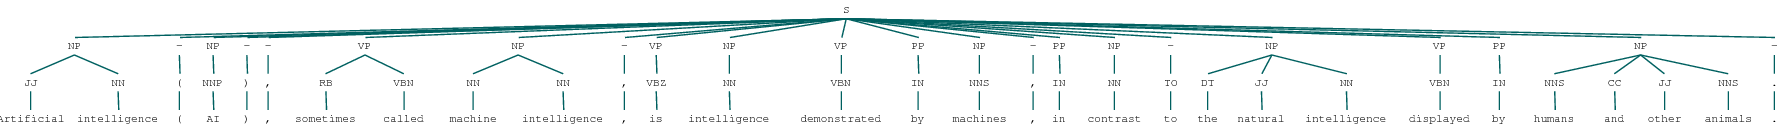

In [14]:
visualize_sentence_tree_inline(t)

## Dependency Parser

How do words depend on each other?

In [12]:
import spacy
parser = spacy.load('en')


In [13]:
parsed_sent = parser(unicode(sentence))

In [14]:
dependency_pattern = '{left}<---{word}[{w_type}]--->{right}\n--------'
for token in parsed_sent:
    print dependency_pattern.format(word=token.orth_, 
                                  w_type=token.dep_,
                                  left=[t.orth_ 
                                            for t 
                                            in token.lefts],
                                  right=[t.orth_ 
                                             for t 
                                             in token.rights])

[]<---Artificial[amod]--->[]
--------
[u'Artificial']<---intelligence[nsubj]--->[u'AI', u',']
--------
[]<---([punct]--->[]
--------
[u'(']<---AI[appos]--->[u')']
--------
[]<---)[punct]--->[]
--------
[]<---,[punct]--->[]
--------
[]<---sometimes[advmod]--->[]
--------
[u'intelligence', u'sometimes']<---called[ccomp]--->[u'intelligence']
--------
[]<---machine[compound]--->[]
--------
[u'machine']<---intelligence[dobj]--->[]
--------
[]<---,[punct]--->[]
--------
[u'called', u',']<---is[ROOT]--->[u'intelligence', u'.']
--------
[]<---intelligence[nsubj]--->[u'demonstrated']
--------
[]<---demonstrated[acl]--->[u'by', u',', u'in']
--------
[]<---by[agent]--->[u'machines']
--------
[]<---machines[pobj]--->[]
--------
[]<---,[punct]--->[]
--------
[]<---in[prep]--->[u'contrast']
--------
[]<---contrast[pobj]--->[u'to']
--------
[]<---to[prep]--->[u'intelligence']
--------
[]<---the[det]--->[]
--------
[]<---natural[amod]--->[]
--------
[u'the', u'natural']<---intelligence[pobj]--->[u'dis

In [21]:
sentence2 = "Bayern Munich, or FC Bayern, is a German sports club based in Munich, Bavaria, Germany."

/home/simon/.virtualenvs/r-tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: The StanfordDependencyParser will be deprecated
Please use nltk.parse.corenlp.StanforCoreNLPDependencyParser instead.
  """


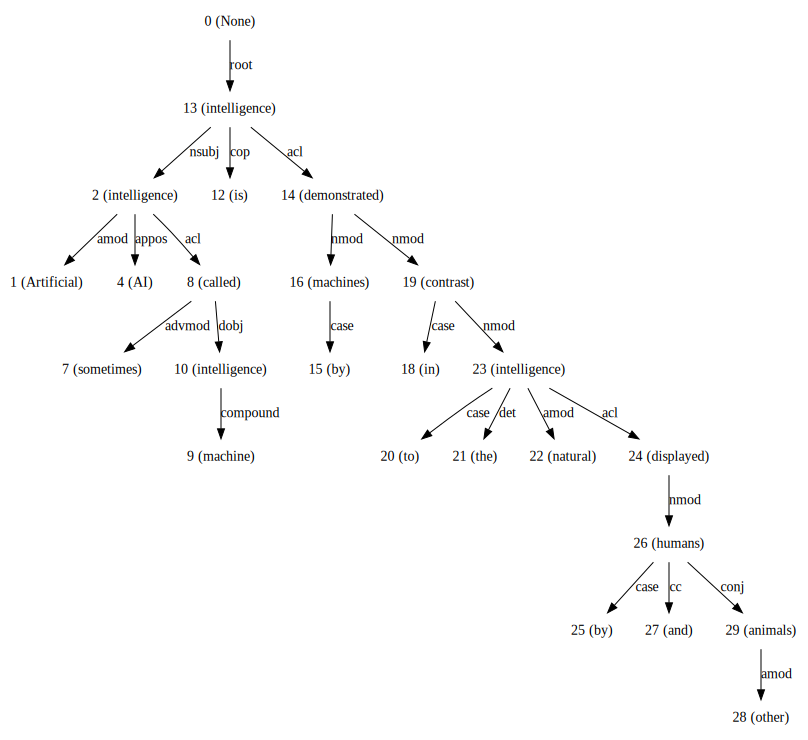

In [22]:
from nltk.parse.stanford import StanfordDependencyParser
path_to_jar = '/home/simon/nltk_data/stanford/stanford-parser-full-2018-02-27/stanford-parser.jar'
path_to_models_jar = '/home/simon/nltk_data/stanford/stanford-english-corenlp-2018-02-27-models.jar'

spd = StanfordDependencyParser(path_to_jar=path_to_jar, path_to_models_jar=path_to_models_jar)

result = list(spd.raw_parse(sentence))
result[0]

/home/simon/.virtualenvs/r-tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: The StanfordDependencyParser will be deprecated
Please use nltk.parse.corenlp.StanforCoreNLPDependencyParser instead.
  """


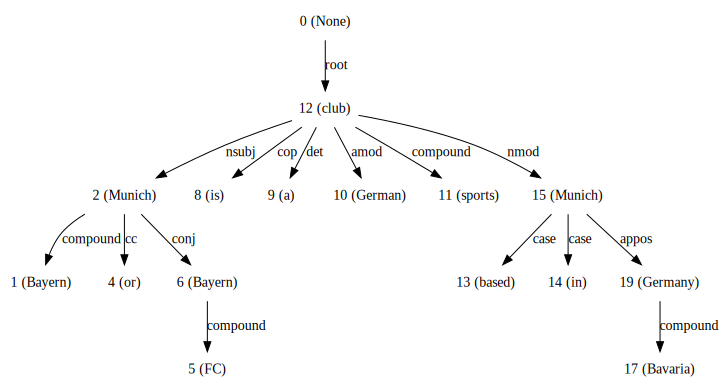

In [23]:
from nltk.parse.stanford import StanfordDependencyParser
path_to_jar = '/home/simon/nltk_data/stanford/stanford-parser-full-2018-02-27/stanford-parser.jar'
path_to_models_jar = '/home/simon/nltk_data/stanford/stanford-english-corenlp-2018-02-27-models.jar'

spd = StanfordDependencyParser(path_to_jar=path_to_jar, path_to_models_jar=path_to_models_jar)

result = list(spd.raw_parse(sentence2))
result[0]

TypeError: 'DependencyGraph' object does not support indexing

In [28]:
dep_tree = [parse.tree() for parse in result][0]

In [29]:
# dep_tree.draw()

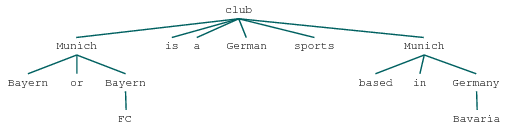

In [30]:
display(dep_tree)

# Constituency Parser

/home/simon/.virtualenvs/r-tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The StanfordParser will be deprecated
Please use nltk.parse.corenlp.StanforCoreNLPParser instead.
  


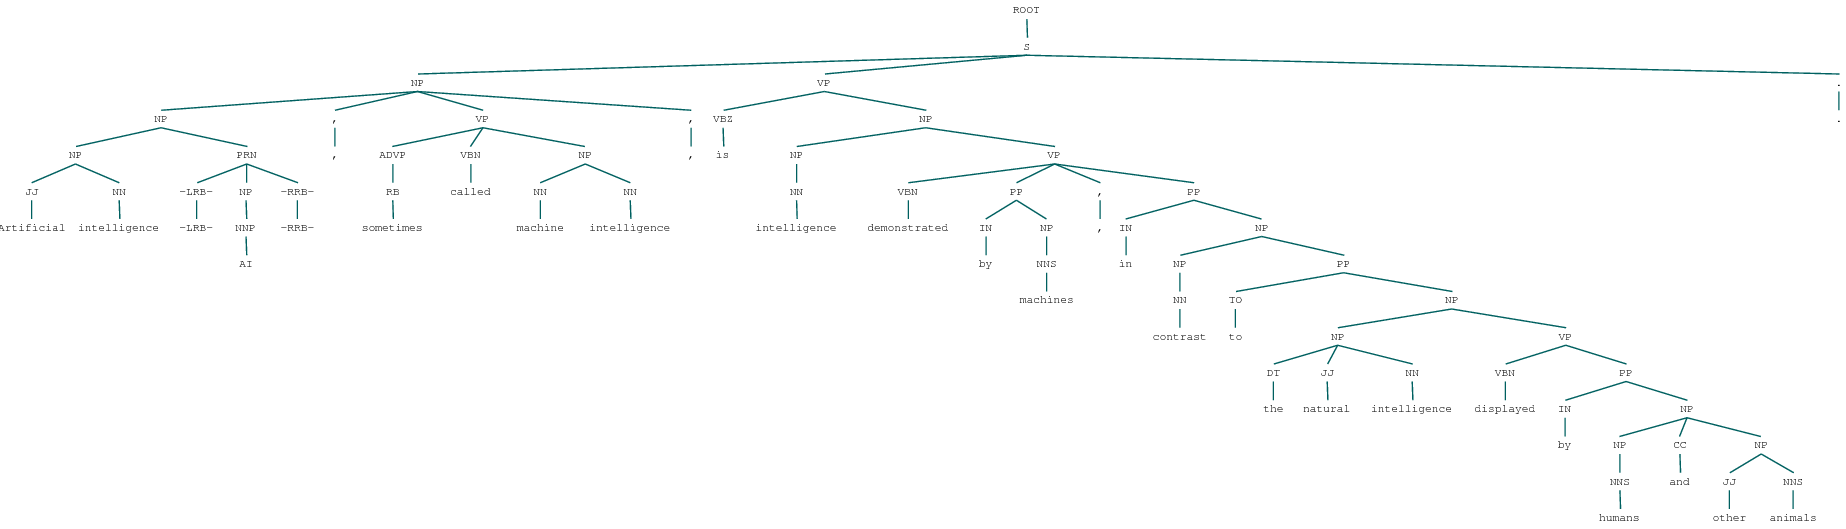

In [23]:
from nltk.parse.stanford import StanfordParser
scp = StanfordParser(path_to_jar=path_to_jar, path_to_models_jar=path_to_models_jar)

result = list(scp.raw_parse(sentence))
result[0]